In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
# Loading the data
data = pd.read_csv('.\static\data\wineQualityReds.csv')
data.head(5)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Define dependend and independent variables
x = data['alcohol']
y = data['quality']

In [5]:
# Reshape into matrix
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(1599, 1)

In [6]:
# Regression itself
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# R-squared
reg.score(x_matrix,y)

0.2267343681112317

In [8]:
# Coefficients
reg.coef_

array([0.36084177])

In [9]:
# Intercept
reg.intercept_

1.8749748870415615

In [10]:
# Making predictions
new_data = pd.DataFrame(data=[5,10,12,15],columns=['alcohol'])
new_data['Predicted_Quality'] = reg.predict(new_data)
new_data

,alcohol,Predicted_Quality
0,5,3.679184
1,10,5.483393
2,12,6.205076
3,15,7.287601


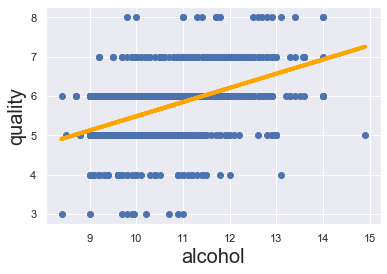

In [11]:
# Plot the regression line (predicted variables based on data)
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('alcohol',fontsize=20)
plt.ylabel('quality',fontsize=20)
plt.show()

In [21]:
# Feature scaling
from sklearn.feature_selection import f_regression
f_regression(x_matrix,y)
p_values = f_regression(x_matrix,y)[1]

# Create summary table
reg_summary = pd.DataFrame(data=['alcohol'],columns=['features'])
reg_summary['coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,features,coefficients,p-values
0,alcohol,0.384417,0.0


In [14]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_matrix)
x_scaled = scaler.transform(x_matrix)
x_scaled

array([[-0.96024611],
       [-0.58477711],
       [-0.58477711],
       ...,
       [ 0.54162988],
       [-0.20930812],
       [ 0.54162988]])

In [22]:
# Regression with scaled features
reg = LinearRegression()
reg.fit(x_scaled,y)

# Creating summary table
reg_summary = pd.DataFrame([['bias'],['alcohol']], columns=['features'])
reg_summary['weights'] = reg.intercept_, reg.coef_[0]
reg_summary

,features,weights
0,bias,5.636023
1,alcohol,0.384417


In [26]:
# Making predictions with standardized coefficients (weights)
new_data = pd.DataFrame(data=[5,10,12,15],columns=['alcohol'])
reg.predict(new_data)


array([ 7.55810806,  9.48019361, 10.24902783, 11.40227916])

In [27]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-5.09040506],
       [-0.39704261],
       [ 1.48030237],
       [ 4.29631984]])